## Import packages

In [25]:
# Import packages
import pandas as pd
import numpy as np
from tcrdist.repertoire import TCRrep
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import MDS


## Processing data

In [26]:
# Read dataset
data = pd.read_csv("vdjdb.txt", sep='\t')

In [27]:
# Check non value
print(data.isnull().sum())

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64


In [28]:
# Clean the data, remove any v.segm or j.segm is NaN
data_clean = data[data['v.segm'].notnull() & data['j.segm'].notnull()]
print(data_clean.isnull().sum())

complex.id             0
gene                   0
cdr3                   0
v.segm                 0
j.segm                 0
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1479
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

In [29]:
# Choose score = 1, 2, 3
data_scored = data_clean[data_clean['vdjdb.score'].isin([1, 2, 3])]
data_scored.shape
# # 从 vdjdb.score 等于 0 的行中随机选取 2000 行
# data_score_0 = data_clean[data_clean['vdjdb.score'] == 0].sample(n=5000, random_state=2)  # 这里设置一个随机状态以便结果可复现

# # 将这两部分数据合并
# data_scored = pd.concat([data_scored, data_score_0])
# data_scored

(12156, 21)

## Define functions 

In [62]:
# Define a function to calculate 
def calculate_tr(input_df, species, chain_name):
    # TCRdist3
    tr = TCRrep(cell_df=input_df,
                            organism=species,
                            chains=[chain_name],
                            db_file='alphabeta_gammadelta_db.tsv')
    if chain_name == 'alpha':
        # distance matrix for alpha chain
        dismatrix = tr.pw_alpha
        # clone df 
        clonedf = tr.clone_df 
    else:
        dismatrix = tr.pw_beta
        clonedf = tr.clone_df 
    
    # return the distance matrix and corresponding dataframe
    return dismatrix, clonedf

In [96]:
# Define plot function, focus on TCR and antigen epitope relation
def plot2d_antigen_epitope_human(input_matrix, clone_df, species, chain_name):
    mds = MDS(n_components=2, dissimilarity="precomputed")
    positions = mds.fit_transform(input_matrix)
    
    tsne = TSNE(n_components=2, perplexity=90, init=positions, metric='precomputed', learning_rate=1000, random_state=48)
    tsne_results = tsne.fit_transform(input_matrix)
    # -------------------------------------------------------------------------
    # Here specificity is assumed as antigen.epitope
    specificity = clone_df['antigen.epitope']
    # Get unique antigen epitope
    unique_antigen_epitope = np.unique(specificity)
    
    # Define color list
    color_list = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2"  
    ]
    
    # Make sure the length of the color list =  number of unique_antigen_epitope
    colors = color_list[:len(unique_antigen_epitope)]
    
    # Create a dictionary, contains each antigen epitope and its color
    # Mapping color
    color_map = dict(zip(unique_antigen_epitope, colors))
    plt.figure(figsize=(10, 8))
    
    # For loop obtains corresponding antigen.epitope and color
    for antigen_epitope, color in color_map.items():
        # specificity is a series contains all antigen epitope
        true_indiex = (specificity == antigen_epitope)
        # Plot scatter
        plt.scatter(tsne_results[true_indiex, 0], tsne_results[true_indiex, 1], color=color, label=antigen_epitope,
                    alpha=0.7)

    # Add title, xy label and legend
    plt.title('t-SNE 2-dimensional plot of TCRs based on antigen.epitope({} {} chain) '.format(species, chain_name), fontweight='bold', fontsize=15)
    plt.xlabel('t-SNE x-axis')
    plt.ylabel('t-SNE y-axis')
    plt.legend(title='antigen.epitope', bbox_to_anchor=(1, 1), loc='upper left', fontsize=6)
    plt.grid(True)
    plt.show()

In [85]:
# Define plot function, focus on TCR and antigen epitope relation
def plot2d_antigen_epitope_mouse(input_matrix, clone_df, species, chain_name):
    mds = MDS(n_components=2, dissimilarity="precomputed")
    positions = mds.fit_transform(input_matrix)
    
    tsne = TSNE(n_components=2, perplexity=50, init=positions, metric='precomputed', learning_rate=800, random_state=48)
    tsne_results = tsne.fit_transform(input_matrix)
    # -------------------------------------------------------------------------
    # Here specificity is assumed as antigen.epitope
    specificity = clone_df['antigen.epitope']
    # Get unique antigen epitope
    unique_antigen_epitope = np.unique(specificity)
    
    # Define color list
    color_list = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2" 
    ]
    
    # Make sure the length of the color list =  number of unique_antigen_epitope
    colors = color_list[:len(unique_antigen_epitope)]
    
    # Create a dictionary, contains each antigen epitope and its color
    # Mapping color
    color_map = dict(zip(unique_antigen_epitope, colors))
    plt.figure(figsize=(10, 8))
    
    # For loop obtains corresponding antigen.epitope and color
    for antigen_epitope, color in color_map.items():
        # specificity is a series contains all antigen epitope
        true_indiex = (specificity == antigen_epitope)
        # Plot scatter
        plt.scatter(tsne_results[true_indiex, 0], tsne_results[true_indiex, 1], color=color, label=antigen_epitope,
                    alpha=0.7)

    # Add title, xy label and legend
    plt.title('t-SNE 2-dimensional plot of TCRs based on antigen.epitope({} {} chain) '.format(species, chain_name), fontweight='bold', fontsize=15)
    plt.xlabel('t-SNE x-axis')
    plt.ylabel('t-SNE y-axis')
    plt.legend(title='antigen.epitope', bbox_to_anchor=(1, 1), loc='upper left', fontsize=6)
    plt.grid(True)
    plt.show()

## Human antigen.epitope(alpha and beta chains)

In [30]:
# Select gene is TRA and species is HomoSapiens(human)
human_clean_alpha_df = data_scored[(data_scored['gene'] == 'TRA') & (data_scored['species'] == 'HomoSapiens')]
# Select gene is TRB and species is HomoSapiens(human)
human_clean_beta_df = data_scored[(data_scored['gene'] == 'TRB') & (data_scored['species'] == 'HomoSapiens')]

In [31]:
# Rename the columns(alpha)
human_clean_alpha_df.rename(columns={'gene': 'gene_a', 'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'},
                      inplace=True)

# Rename the columns(beta)
human_clean_beta_df.rename(columns={'gene': 'gene_b', 'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'},
                     inplace=True)

C:\Users\86137\AppData\Local\Temp\ipykernel_27644\2796646965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_clean_alpha_df.rename(columns={'gene': 'gene_a', 'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'},
C:\Users\86137\AppData\Local\Temp\ipykernel_27644\2796646965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_clean_beta_df.rename(columns={'gene': 'gene_b', 'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'},


In [92]:
# Use calculate_tr_alpha get human alpha chain distance matrix and clone_df

# Calculate value counts of antigen.epitope(beta and alpha) , select the first 7 epitopes
top_epitopes_alpha = human_clean_alpha_df['antigen.epitope'].value_counts().head(10).index
top_epitopes_beta = human_clean_alpha_df['antigen.epitope'].value_counts().head(10).index

# Filter dataframe 
filtered_human_clean_alpha_df= human_clean_alpha_df[human_clean_alpha_df['antigen.epitope'].isin(top_epitopes_alpha)]
filtered_human_clean_beta_df= human_clean_beta_df[human_clean_beta_df['antigen.epitope'].isin(top_epitopes_beta)]

# Distance matrix and clone df compution 
human_alpha_dismatrix,human_alpha_clonedf = calculate_tr(filtered_human_clean_alpha_df, 'human', 'alpha')
human_beta_dismatrix,human_beta_clonedf = calculate_tr(filtered_human_clean_beta_df, 'human', 'beta')

print(filtered_human_clean_beta_df['antigen.epitope'].value_counts()) # check 

E:\anaconda\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column

NLVPMVATV               790
GILGFVFTL               425
GLCTLVAML               356
NEGVKAAW                216
FRDYVDRFYKTLRAEQASQE    152
KAFSPEVIPMF             143
YLQPRTFLL               139
TFEYVSQPFLMDLE           99
KLVALGINAV               69
QYIKWPWYI                65
Name: antigen.epitope, dtype: int64


E:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


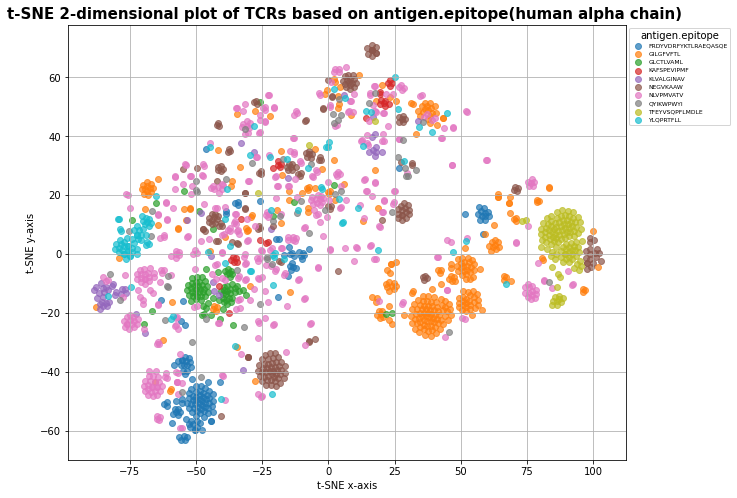

In [99]:
# human alpha chain 2-dimenasional plot
plot2d_antigen_epitope_human(human_alpha_dismatrix, human_alpha_clonedf, 'human', 'alpha')

E:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


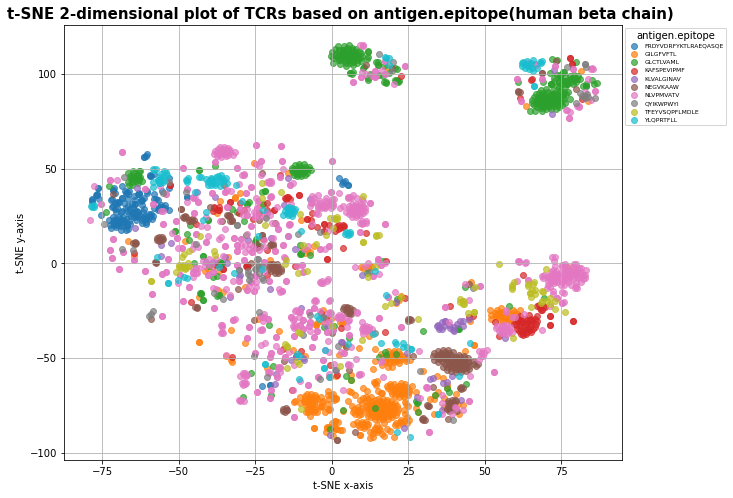

In [101]:
# human beta chain 2-dimenasional plot
plot2d_antigen_epitope_human(human_beta_dismatrix, human_beta_clonedf,'human', 'beta')

##  Mouse antigen.epitope(alpha and beta chains)

In [38]:
# Select gene is TRA and species is MusMusculus(mouse)
mouse_clean_alpha_df = data_scored[(data_scored['gene'] == 'TRA') & (data_scored['species'] == 'MusMusculus')]
# Select gene is TRB and species is MusMusculus(mouse)
mouse_clean_beta_df = data_scored[(data_scored['gene'] == 'TRB') & (data_scored['species'] == 'MusMusculus')]

In [39]:
# Rename the columns(alpha)
mouse_clean_alpha_df.rename(columns={'gene': 'gene_a', 'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'},
                      inplace=True)

# Rename the columns(beta)
mouse_clean_beta_df.rename(columns={'gene': 'gene_b', 'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'},
                     inplace=True)

C:\Users\86137\AppData\Local\Temp\ipykernel_27644\1033057545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_clean_alpha_df.rename(columns={'gene': 'gene_a', 'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'},
C:\Users\86137\AppData\Local\Temp\ipykernel_27644\1033057545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_clean_beta_df.rename(columns={'gene': 'gene_b', 'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'},


In [71]:
# Use calculate_tr_alpha get human alpha chain distance matrix and clone_df

# Calculate value counts of antigen.epitope(beta and alpha) , select the first 7 epitopes
top_epitopes_alpha1 = mouse_clean_alpha_df['antigen.epitope'].value_counts().head(7).index
top_epitopes_beta1 = mouse_clean_beta_df['antigen.epitope'].value_counts().head(7).index

# Calculate value counts of antigen.epitope(beta and alpha) , select the first 7 epitopes
filtered_mouse_clean_alpha_df= mouse_clean_alpha_df[mouse_clean_alpha_df['antigen.epitope'].isin(top_epitopes_alpha1)]
filtered_mouse_clean_beta_df= mouse_clean_beta_df[mouse_clean_beta_df['antigen.epitope'].isin(top_epitopes_beta1)]

# Calculate alpha chain dismatrix and its clone dataframe 
mouse_alpha_dismatrix, mouse_alpha_clonedf = calculate_tr(filtered_mouse_clean_alpha_df, 'mouse', 'alpha')
# Calculate beta chain dismatrix and its clone dataframe 
mouse_beta_dismatrix, mouse_beta_clonedf = calculate_tr(filtered_mouse_clean_beta_df, 'mouse','beta')

filtered_mouse_clean_beta_df['antigen.epitope'].value_counts()

E:\anaconda\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
E:\anaconda\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column

SSYRRPVGI     261
SSPPMFRV      185
ASNENMETM     136
SSLENFRAYV    130
HGIRNASFI     102
SQLLNAKYL      63
TVYGFCLL       63
Name: antigen.epitope, dtype: int64

E:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


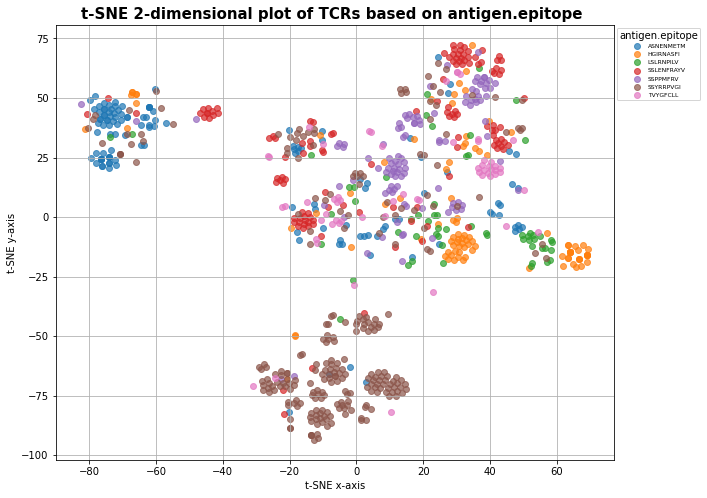

In [70]:
# Mouse Alpha chain 
plot2d_antigen_epitope_mouse(mouse_alpha_dismatrix, mouse_alpha_clonedf)

E:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


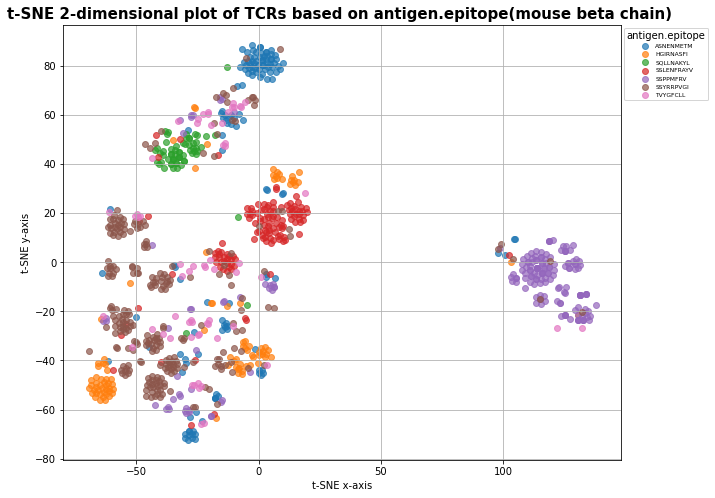

In [86]:
# Mouse beta chain
plot2d_antigen_epitope_mouse(mouse_beta_dismatrix, mouse_beta_clonedf, 'mouse', 'beta')

In [103]:
jupyter notebook --notebook-dir=/path/to/your/foldercmd







SyntaxError: invalid syntax (2569602273.py, line 1)